モジュールのインポート 

In [1]:
from numpy import *
from pylab import *
import Optimizer_with_theano as op 
%matplotlib inline

WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: TITAN X (Pascal) (CNMeM is disabled, cuDNN 5110)
/home/yu/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


yの時系列データをシーケンシャルに10個から、1時刻あとのデータ予測する学習器をつくる

# データの生成

In [139]:
def gen_dataset(v, length):
    v = v.flatten()
    idx = arange(v.size)
    idx = idx[:, None] + arange(length+5)
    idx = idx[:-length]
    xidx = idx[:, :-5]
    yidx = idx[:, -5:]
    x_idx_f = xidx[:-5].flatten()
    y_idx_f = yidx[:-5].flatten()
    x = v[x_idx_f].reshape(-1, 1, 1, length)
    y = v[y_idx_f].reshape(-1, 5)
    return x, y, xidx[:-5], yidx[:-5]

#v = zeros(1000)
#for i in range(10000):
#    v += sin(pi * arange(1000) / randint(10, 1000) + randint(0, 1000)) * arange(1000)[::-1]

v = sin(pi * arange(10000) / arange(1,10001)[::-1]*10) * arange(10000)[::-1]# + random(v.size) * arange(1000)[::-1] * 1
v = v[:-900]

#v = sin(pi * arange(10000) / 1000) #* arange(10000)[::-1]# + random(v.size) * arange(1000)[::-1] * 1

#v = sin(pi * arange(1000) / 30) * arange(1000)# + random(v.size) * arange(1000)[::-1] * 1
x, y, xidx, yidx = gen_dataset(v, 10)

In [140]:
print(x.shape)
print(y.shape)
print(xidx.shape)
print(yidx.shape)


(9085, 1, 1, 10)
(9085, 5)
(9085, 10)
(9085, 5)


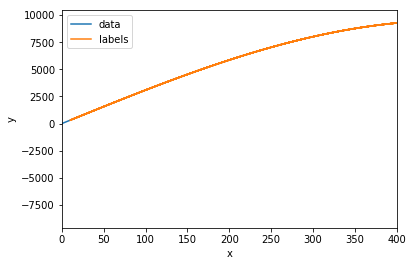

In [144]:
#plot(xidx.flatten(),x.flatten())
plot(arange(v.size),v)
plot(yidx.flatten(),y.flatten())
xlim(00,400)
xlabel("x")
ylabel("y")
legend(["data", "labels"])

データ及びラベルの形は以下の通りである。

In [151]:
print("Shape of x = {}".format(x.shape))
print("Shape of y = {}".format(y.shape))

Shape of x = (9085, 1, 1, 10)
Shape of y = (9085, 5)


# 学習

## UCNNの構築

theanoは1次元の畳込みが無いので、2次元畳込みを用いる 

In [149]:

o = op.optimizer(n_batch=100)
o.set_data(x, y, test_size=0., is_shuffle=False)
o.set_variables()
o1 =  o.conv2d((15, 1, 1, 5), mode="same").relu()
o2 = o1.conv2d((15, 15, 1, 5), mode="same").relu()
o3 = o2.conv2d((15, 15, 1, 5), mode="same").relu()
o4 = o3.conv2d((15, 15, 1, 5), mode="same").relu()
o5 = o4.conv2d((15, 15, 1, 5), mode="same").relu() + o2 #前段の畳込み層をマージ
o6 = o5.conv2d((15, 15, 1, 5), mode="same").relu() + o1 #前段の畳込み層をマージ
o7 = o6.conv2d((15, 15, 1, 5), mode="same").relu()
o8 = o7.conv2d((1, 15, 1, 6), mode="valid")
o9 = o8.flatten()
o = o9.loss_mse()



In [133]:

o = op.optimizer(n_batch=1000)
o.set_data(x, y, test_size=0., is_shuffle=False)
o.set_variables()
o1  =  o.conv2d((1, 1, 1, 5), mode="same").relu()
o2  = o1.conv2d((1, 1, 1, 5), mode="same").relu()
o3  = o2.conv2d((1, 1, 1, 5), mode="same").relu()
o4  = o3.conv2d((1, 1, 1, 5), mode="same").relu()
o5  = o4.conv2d((1, 1, 1, 5), mode="same").relu() 
o6  = o5.conv2d((1, 1, 1, 5), mode="same").relu() 
o7  = o6.conv2d((1, 1, 1, 5), mode="same").relu() 
o8  = o7.conv2d((1, 1, 1, 5), mode="same").relu()  #前段の畳込み層をマージ
o9  = o8.conv2d((1, 1, 1, 5), mode="same").relu()  #前段の畳込み層をマージ
o10 = o9.conv2d((1, 1, 1, 5), mode="same").relu() 
o11 = o10.conv2d((1, 1, 1, 5), mode="same").relu() #+ o10
o12 = o11.conv2d((1, 1, 1, 5), mode="same").relu() #+ o9
o13 = o12.conv2d((1, 1, 1, 5), mode="same").relu() #+ o8
o14 = o13.conv2d((1, 1, 1, 5), mode="same").relu() #+ o7
o15 = o14.conv2d((1, 1, 1, 5), mode="same").relu() #+ o6
o16 = o15.conv2d((1, 1, 1, 5), mode="same").relu() #+ o5
o17 = o16.conv2d((1, 1, 1, 5), mode="same").relu() #+ o4
o18 = o17.conv2d((1, 1, 1, 5), mode="same").relu() + o3 #前段の畳込み層をマージ
o19 = o18.conv2d((1, 1, 1, 5), mode="same").relu() + o2 #前段の畳込み層をマージ
o20 = o19.conv2d((1, 1, 1, 5), mode="same").relu() 
o21 = o20.conv2d((1, 1, 1, 10), mode="valid")
o22 = o21.flatten()
o   = o22.loss_mse()



(1, 1, 1)


最適化手法を定義し、最適化させる。 

In [104]:
o = o.opt_Adam(0.01).compile()
o = o.optimize(10000000,10)

Epoch. 0: loss = 2.4264e+07, acc = 0.0000e+00, valid. loss = nan, valid. acc. = nan.
Epoch. 10: loss = 1.8232e+07, acc = 0.0000e+00, valid. loss = nan, valid. acc. = nan.
Epoch. 20: loss = 1.8269e+07, acc = 0.0000e+00, valid. loss = nan, valid. acc. = nan.
Epoch. 30: loss = 1.8242e+07, acc = 0.0000e+00, valid. loss = nan, valid. acc. = nan.
Epoch. 40: loss = 1.8254e+07, acc = 0.0000e+00, valid. loss = nan, valid. acc. = nan.
KeyboardInterrupt



In [152]:
o = o.opt_Adam(0.001).compile()
o = o.optimize(10000000,10)


Epoch. 0: loss = 7.5868e+06, acc = 0.0000e+00, valid. loss = nan, valid. acc. = nan.
Epoch. 10: loss = 2.1253e+05, acc = 0.0000e+00, valid. loss = nan, valid. acc. = nan.
Epoch. 20: loss = 1.6906e+05, acc = 0.0000e+00, valid. loss = nan, valid. acc. = nan.
Epoch. 30: loss = 1.2569e+05, acc = 0.0000e+00, valid. loss = nan, valid. acc. = nan.
Epoch. 40: loss = 1.6964e+05, acc = 0.0000e+00, valid. loss = nan, valid. acc. = nan.
Epoch. 50: loss = 1.8341e+05, acc = 0.0000e+00, valid. loss = nan, valid. acc. = nan.
Epoch. 60: loss = 7.9701e+04, acc = 0.0000e+00, valid. loss = nan, valid. acc. = nan.
Epoch. 70: loss = 9.7060e+04, acc = 0.0000e+00, valid. loss = nan, valid. acc. = nan.
Epoch. 80: loss = 1.5951e+05, acc = 0.0000e+00, valid. loss = nan, valid. acc. = nan.
Epoch. 90: loss = 5.9042e+04, acc = 0.0000e+00, valid. loss = nan, valid. acc. = nan.
Epoch. 100: loss = 6.7150e+04, acc = 0.0000e+00, valid. loss = nan, valid. acc. = nan.
Epoch. 110: loss = 7.9804e+04, acc = 0.0000e+00, valid

In [245]:

o = o.opt_Adam(0.00001).compile()
o = o.optimize(10000000,1)

Epoch. 0: loss = nan, acc = 0.0000e+00, valid. loss = nan, valid. acc. = nan.
Epoch. 1: loss = nan, acc = 0.0000e+00, valid. loss = nan, valid. acc. = nan.
Epoch. 2: loss = nan, acc = 0.0000e+00, valid. loss = nan, valid. acc. = nan.
Epoch. 3: loss = nan, acc = 0.0000e+00, valid. loss = nan, valid. acc. = nan.
Epoch. 4: loss = nan, acc = 0.0000e+00, valid. loss = nan, valid. acc. = nan.
Epoch. 5: loss = nan, acc = 0.0000e+00, valid. loss = nan, valid. acc. = nan.
Epoch. 6: loss = nan, acc = 0.0000e+00, valid. loss = nan, valid. acc. = nan.
Epoch. 7: loss = nan, acc = 0.0000e+00, valid. loss = nan, valid. acc. = nan.
Epoch. 8: loss = nan, acc = 0.0000e+00, valid. loss = nan, valid. acc. = nan.
Epoch. 9: loss = nan, acc = 0.0000e+00, valid. loss = nan, valid. acc. = nan.
Epoch. 10: loss = nan, acc = 0.0000e+00, valid. loss = nan, valid. acc. = nan.
Epoch. 11: loss = nan, acc = 0.0000e+00, valid. loss = nan, valid. acc. = nan.
Epoch. 12: loss = nan, acc = 0.0000e+00, valid. loss = nan, va

In [ ]:
## 学習結果の評価

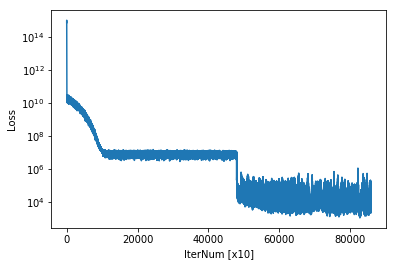

In [119]:
o.view()

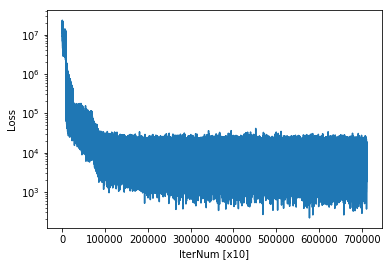

In [25]:
o.view()

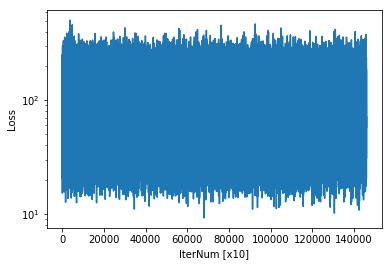

In [102]:
o.view()

(9085, 5)

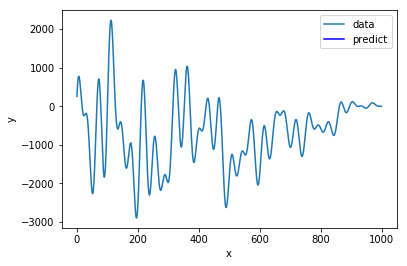

In [247]:
plot(arange(v.size),v)
plot(yidx.flatten(), o.pred_func(x.reshape(-1, 1, 1, 10).astype(float32)).flatten(), c="b")
xlabel("x")
ylabel("y")
legend(["data", "predict"])

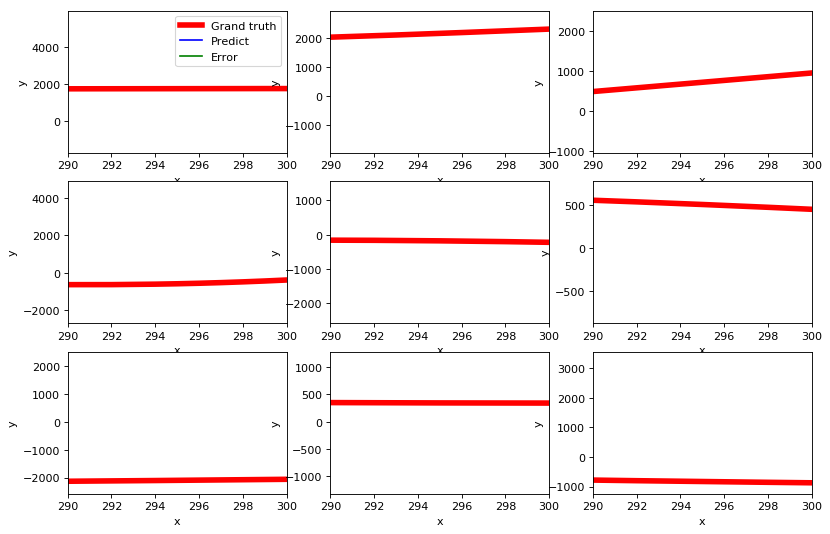

In [248]:
#figsize(10,10)
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
is_first = True
for i in range(1,10,1):
    subplot(3, 3, i)
    v = zeros(1000)
    for i in range(10):
        #v += sin(pi * arange(1000) / 10) * arange(1000)[::-1]
        #v += sin(pi * arange(1000) / rand(1) / 100 + randint(0, 1000)) * arange(1000)[::-1]
        v += sin(pi * arange(1000) / randint(10, 1000) + randint(0, 1000)) * arange(1000)[::-1]
    #v2 = sin(pi * arange(1000) / 50) * arange(1000)[::-1]
    #v3 = cos(pi * arange(1000) / 250) * arange(1000)[::-1]
    v = v# + random(v.size)* arange(1000)[::-1] * 1
    #v = sin(pi * arange(1000) / 100) * arange(1000)[::-1] + random(v.size) * arange(1000)[::-1] * 1
    x, y, xidx, yidx = gen_dataset(v, 10) 
    #plot(xidx[0:100], x[0:100].reshape(-1,10), c="r")
    plot(arange(v.size),v, c="r",lw=5, label="Grand truth")
#plot(yidx.flatten(),y.flatten())
    plot(yidx.flatten(), o.pred_func(x.reshape(-1, 1, 1, 10).astype(float32)).flatten(), c="b", label="Predict")
    plot(yidx.flatten(), abs(y.flatten() - o.pred_func(x.reshape(-1, 1, 1, 10).astype(float32)).flatten()), c="g", label="Error")
    xlim(290,300)
    
    #scatter(yidx[0:1000], o.y_train_arr[0:1000])
    xlabel("x")
    ylabel("y")
    if is_first:
        legend()
        is_first = False


In [161]:
line = loadtxt("/home/yu/Downloads/USDJPY.csv", delimiter=",")

適当な為替データ　http://www.m2j.co.jp/market/historical.php

In [162]:
line.shape

(2684, 4)

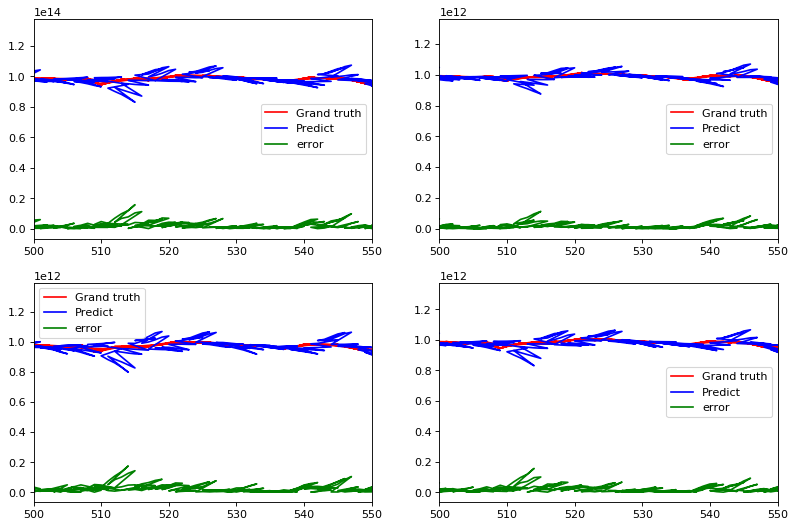

In [241]:
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
for i,l in enumerate(line.T):
    #l *= 100
    subplot(2, 2, i+1)
    x, y, xidx, yidx = gen_dataset(l, 10) 
    plot(yidx.flatten(), y.astype(float32).flatten(), c="r")
    plot(yidx.flatten(), o.pred_func(x.reshape(-1, 1, 1, 10).astype(float32)).flatten(), c="b")
    plot(yidx.flatten(), abs(y.flatten() - o.pred_func(x.reshape(-1, 1, 1, 10).astype(float32)).flatten()), c="g")
    xlim(500,550)
    legend(["Grand truth", "Predict", "error"])

# 処理結果を保存

In [134]:
o.save("result.pkl")

In [235]:
o.x_train_arr

array([[[[          nan,           nan,           nan, ...,           nan,
                    nan,           nan]]],


       [[[  31.41273308,   62.82515335,   94.23695374, ...,  251.27575684,
           282.67730713,  314.0760498 ]]],


       [[[  62.82515335,   94.23695374,  125.64782715, ...,  282.67730713,
           314.0760498 ,  345.47167969]]],


       ..., 
       [[[ 193.10998535, -146.85731506, -466.5289917 , ..., -602.89935303,
          -307.61749268,   31.37511826]]],


       [[[-146.85731506, -466.5289917 , -721.5279541 , ..., -307.61749268,
            31.37511826,  365.84967041]]],


       [[[-466.5289917 , -721.5279541 , -876.09741211, ...,   31.37511826,
           365.84967041,  647.80975342]]]], dtype=float32)

In [236]:
shape = o.x_train_arr.shape
arr = o.x_train_arr[1]
lst = []
for i in range(1000):
    pred = o.pred_func([arr])
    arr = np.append(arr.flatten()[1:], pred.flatten()[0]).reshape(shape[1:])
    lst += arr.flatten().tolist()
    print(arr)

[[[  62.82515335   94.23695374  125.64782715  157.05744934  188.4655304
    219.87173462  251.27575684  282.67730713  314.0760498   346.2428894 ]]]
[[[  94.23695374  125.64782715  157.05744934  188.4655304   219.87173462
    251.27575684  282.67730713  314.0760498   346.2428894   379.03552246]]]
[[[ 125.64782715  157.05744934  188.4655304   219.87173462  251.27575684
    282.67730713  314.0760498   346.2428894   379.03552246  412.54400635]]]
[[[ 157.05744934  188.4655304   219.87173462  251.27575684  282.67730713
    314.0760498   346.2428894   379.03552246  412.54400635  442.51663208]]]
[[[ 188.4655304   219.87173462  251.27575684  282.67730713  314.0760498
    346.2428894   379.03552246  412.54400635  442.51663208  473.23428345]]]
[[[ 219.87173462  251.27575684  282.67730713  314.0760498   346.2428894
    379.03552246  412.54400635  442.51663208  473.23428345  500.34555054]]]
[[[ 251.27575684  282.67730713  314.0760498   346.2428894   379.03552246
    412.54400635  442.51663208  473.

[[[ 49.70943451  47.405159    45.17123032  43.03183746  41.01502609
    39.1447525   37.43920135  35.90287781  34.51725769  33.26150513]]]
[[[ 47.405159    45.17123032  43.03183746  41.01502609  39.1447525
    37.43920135  35.90287781  34.51725769  33.26150513  32.11457443]]]
[[[ 45.17123032  43.03183746  41.01502609  39.1447525   37.43920135
    35.90287781  34.51725769  33.26150513  32.11457443  31.04154587]]]
[[[ 43.03183746  41.01502609  39.1447525   37.43920135  35.90287781
    34.51725769  33.26150513  32.11457443  31.04154587  30.0269928 ]]]
[[[ 41.01502609  39.1447525   37.43920135  35.90287781  34.51725769
    33.26150513  32.11457443  31.04154587  30.0269928   29.05457878]]]
[[[ 39.1447525   37.43920135  35.90287781  34.51725769  33.26150513
    32.11457443  31.04154587  30.0269928   29.05457878  28.11091232]]]
[[[ 37.43920135  35.90287781  34.51725769  33.26150513  32.11457443
    31.04154587  30.0269928   29.05457878  28.11091232  27.17881012]]]
[[[ 35.90287781  34.51725769

    0.32723117  0.31240329  0.29796824  0.28399101]]]
[[[ 0.40436259  0.38872617  0.37315956  0.35764444  0.34235933  0.32723117
    0.31240329  0.29796824  0.28399101  0.27061555]]]
[[[ 0.38872617  0.37315956  0.35764444  0.34235933  0.32723117  0.31240329
    0.29796824  0.28399101  0.27061555  0.25801462]]]
[[[ 0.37315956  0.35764444  0.34235933  0.32723117  0.31240329  0.29796824
    0.28399101  0.27061555  0.25801462  0.24632314]]]
[[[ 0.35764444  0.34235933  0.32723117  0.31240329  0.29796824  0.28399101
    0.27061555  0.25801462  0.24632314  0.23565872]]]
[[[ 0.34235933  0.32723117  0.31240329  0.29796824  0.28399101  0.27061555
    0.25801462  0.24632314  0.23565872  0.22601816]]]
[[[ 0.32723117  0.31240329  0.29796824  0.28399101  0.27061555  0.25801462
    0.24632314  0.23565872  0.22601816  0.21730526]]]
[[[ 0.31240329  0.29796824  0.28399101  0.27061555  0.25801462  0.24632314
    0.23565872  0.22601816  0.21730526  0.20938931]]]
[[[ 0.29796824  0.28399101  0.27061555  0.2

[[[ 0.00388394  0.00373664  0.00360175  0.0034786   0.0033623   0.00325227
    0.00314652  0.00304338  0.0029416   0.00284079]]]
[[[ 0.00373664  0.00360175  0.0034786   0.0033623   0.00325227  0.00314652
    0.00304338  0.0029416   0.00284079  0.00274074]]]
[[[ 0.00360175  0.0034786   0.0033623   0.00325227  0.00314652  0.00304338
    0.0029416   0.00284079  0.00274074  0.00264115]]]
[[[ 0.0034786   0.0033623   0.00325227  0.00314652  0.00304338  0.0029416
    0.00284079  0.00274074  0.00264115  0.00254252]]]
[[[ 0.0033623   0.00325227  0.00314652  0.00304338  0.0029416   0.00284079
    0.00274074  0.00264115  0.00254252  0.00244423]]]
[[[ 0.00325227  0.00314652  0.00304338  0.0029416   0.00284079  0.00274074
    0.00264115  0.00254252  0.00244423  0.00234638]]]
[[[ 0.00314652  0.00304338  0.0029416   0.00284079  0.00274074  0.00264115
    0.00254252  0.00244423  0.00234638  0.00224886]]]
[[[ 0.00304338  0.0029416   0.00284079  0.00274074  0.00264115  0.00254252
    0.00244423  0.00234

[[[  1.84952314e-05   1.78615865e-05   1.72326545e-05   1.66067457e-05
     1.59867177e-05   1.53689853e-05   1.47539058e-05   1.41409473e-05
     1.35368527e-05   1.29391055e-05]]]
[[[  1.78615865e-05   1.72326545e-05   1.66067457e-05   1.59867177e-05
     1.53689853e-05   1.47539058e-05   1.41409473e-05   1.35368527e-05
     1.29391055e-05   1.23530053e-05]]]
[[[  1.72326545e-05   1.66067457e-05   1.59867177e-05   1.53689853e-05
     1.47539058e-05   1.41409473e-05   1.35368527e-05   1.29391055e-05
     1.23530053e-05   1.17824538e-05]]]
[[[  1.66067457e-05   1.59867177e-05   1.53689853e-05   1.47539058e-05
     1.41409473e-05   1.35368527e-05   1.29391055e-05   1.23530053e-05
     1.17824538e-05   1.12298721e-05]]]
[[[  1.59867177e-05   1.53689853e-05   1.47539058e-05   1.41409473e-05
     1.35368527e-05   1.29391055e-05   1.23530053e-05   1.17824538e-05
     1.12298721e-05   1.07009446e-05]]]
[[[  1.53689853e-05   1.47539058e-05   1.41409473e-05   1.35368527e-05
     1.29391055e-05

[[[  5.20491028e-08   5.02460260e-08   4.85593752e-08   4.69631836e-08
     4.54343265e-08   4.39512888e-08   4.24884377e-08   4.10426360e-08
     3.96065900e-08   3.81794791e-08]]]
[[[  5.02460260e-08   4.85593752e-08   4.69631836e-08   4.54343265e-08
     4.39512888e-08   4.24884377e-08   4.10426360e-08   3.96065900e-08
     3.81794791e-08   3.67612287e-08]]]
[[[  4.85593752e-08   4.69631836e-08   4.54343265e-08   4.39512888e-08
     4.24884377e-08   4.10426360e-08   3.96065900e-08   3.81794791e-08
     3.67612287e-08   3.53536151e-08]]]
[[[  4.69631836e-08   4.54343265e-08   4.39512888e-08   4.24884377e-08
     4.10426360e-08   3.96065900e-08   3.81794791e-08   3.67612287e-08
     3.53536151e-08   3.39487265e-08]]]
[[[  4.54343265e-08   4.39512888e-08   4.24884377e-08   4.10426360e-08
     3.96065900e-08   3.81794791e-08   3.67612287e-08   3.53536151e-08
     3.39487265e-08   3.25505205e-08]]]
[[[  4.39512888e-08   4.24884377e-08   4.10426360e-08   3.96065900e-08
     3.81794791e-08

     7.80935455e-11   7.49012588e-11]]]
[[[  1.00932318e-10   9.75895059e-11   9.42903672e-11   9.10114276e-11
     8.77567047e-11   8.45136322e-11   8.13026382e-11   7.80935455e-11
     7.49012588e-11   7.17292198e-11]]]
[[[  9.75895059e-11   9.42903672e-11   9.10114276e-11   8.77567047e-11
     8.45136322e-11   8.13026382e-11   7.80935455e-11   7.49012588e-11
     7.17292198e-11   6.86048371e-11]]]
[[[  9.42903672e-11   9.10114276e-11   8.77567047e-11   8.45136322e-11
     8.13026382e-11   7.80935455e-11   7.49012588e-11   7.17292198e-11
     6.86048371e-11   6.55181465e-11]]]
[[[  9.10114276e-11   8.77567047e-11   8.45136322e-11   8.13026382e-11
     7.80935455e-11   7.49012588e-11   7.17292198e-11   6.86048371e-11
     6.55181465e-11   6.25105800e-11]]]
[[[  8.77567047e-11   8.45136322e-11   8.13026382e-11   7.80935455e-11
     7.49012588e-11   7.17292198e-11   6.86048371e-11   6.55181465e-11
     6.25105800e-11   5.95861069e-11]]]
[[[  8.45136322e-11   8.13026382e-11   7.80935455e

[[[  1.94254186e-13   1.86921998e-13   1.79596992e-13   1.72309839e-13
     1.65046145e-13   1.57905806e-13   1.50833949e-13   1.43934967e-13
     1.37220259e-13   1.30746014e-13]]]
[[[  1.86921998e-13   1.79596992e-13   1.72309839e-13   1.65046145e-13
     1.57905806e-13   1.50833949e-13   1.43934967e-13   1.37220259e-13
     1.30746014e-13   1.24584750e-13]]]
[[[  1.79596992e-13   1.72309839e-13   1.65046145e-13   1.57905806e-13
     1.50833949e-13   1.43934967e-13   1.37220259e-13   1.30746014e-13
     1.24584750e-13   1.18820088e-13]]]
[[[  1.72309839e-13   1.65046145e-13   1.57905806e-13   1.50833949e-13
     1.43934967e-13   1.37220259e-13   1.30746014e-13   1.24584750e-13
     1.18820088e-13   1.13505342e-13]]]
[[[  1.65046145e-13   1.57905806e-13   1.50833949e-13   1.43934967e-13
     1.37220259e-13   1.30746014e-13   1.24584750e-13   1.18820088e-13
     1.13505342e-13   1.08699020e-13]]]
[[[  1.57905806e-13   1.50833949e-13   1.43934967e-13   1.37220259e-13
     1.30746014e-13

In [222]:
pred

array([[ -7.04274369e-20,  -6.70963870e-20,  -5.71357431e-20,
         -6.14977443e-20,  -8.28823729e-20]], dtype=float32)

In [223]:
arr.flatten()[5:]

array([ -1.39232062e-19,  -1.00104105e-19,  -7.67927210e-20,
        -7.67142163e-20,  -6.78079368e-20], dtype=float32)

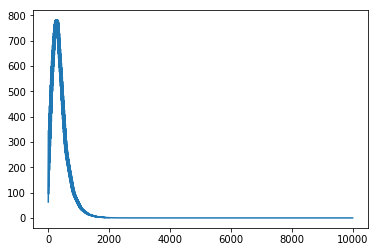

In [237]:
from pylab import *
%matplotlib inline
plot(lst)

In [181]:
xidx

array([[  0,   1,   2, ...,   7,   8,   9],
       [  1,   2,   3, ...,   8,   9,  10],
       [  2,   3,   4, ...,   9,  10,  11],
       ..., 
       [982, 983, 984, ..., 989, 990, 991],
       [983, 984, 985, ..., 990, 991, 992],
       [984, 985, 986, ..., 991, 992, 993]])

In [182]:
yidx

array([[ 10,  11,  12,  13,  14],
       [ 11,  12,  13,  14,  15],
       [ 12,  13,  14,  15,  16],
       ..., 
       [992, 993, 994, 995, 996],
       [993, 994, 995, 996, 997],
       [994, 995, 996, 997, 998]])

In [46]:
lst

[307.6598205566406,
 334.6130676269531,
 361.4441223144531,
 385.1802978515625,
 409.5213317871094,
 433.71136474609375,
 456.8537292480469,
 479.0888671875,
 502.678955078125,
 525.239013671875,
 546.5450439453125,
 568.0827026367188,
 589.0506591796875,
 607.8624267578125,
 625.4252319335938,
 641.7496948242188,
 656.192138671875,
 668.5018310546875,
 680.259765625,
 691.18701171875,
 700.503173828125,
 709.4772338867188,
 718.5374755859375,
 727.5009155273438,
 736.7901000976562,
 746.348876953125,
 756.2208251953125,
 765.8150024414062,
 775.3886108398438,
 785.1541748046875,
 794.6715087890625,
 804.2037353515625,
 813.9677124023438,
 823.720458984375,
 833.4647827148438,
 843.27587890625,
 853.1937255859375,
 863.030517578125,
 872.8491821289062,
 882.8142700195312,
 892.7455444335938,
 902.6446533203125,
 912.6492309570312,
 922.6780395507812,
 932.6759033203125,
 942.6991577148438,
 952.7875366210938,
 962.861328125,
 972.9163208007812,
 983.038818359375,
 993.172607421875,
 10